<a href="https://colab.research.google.com/github/mens0n/hoon4IT/blob/main/Maryland_bicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM
- Cross-Industry Standard Process - Data-Mining
- 가장 많이 사용되는 Data Mining 표준 방법론
- 분야, 산업군을 막론하고 데이터로부터 의미를 도출하는 표준 절차


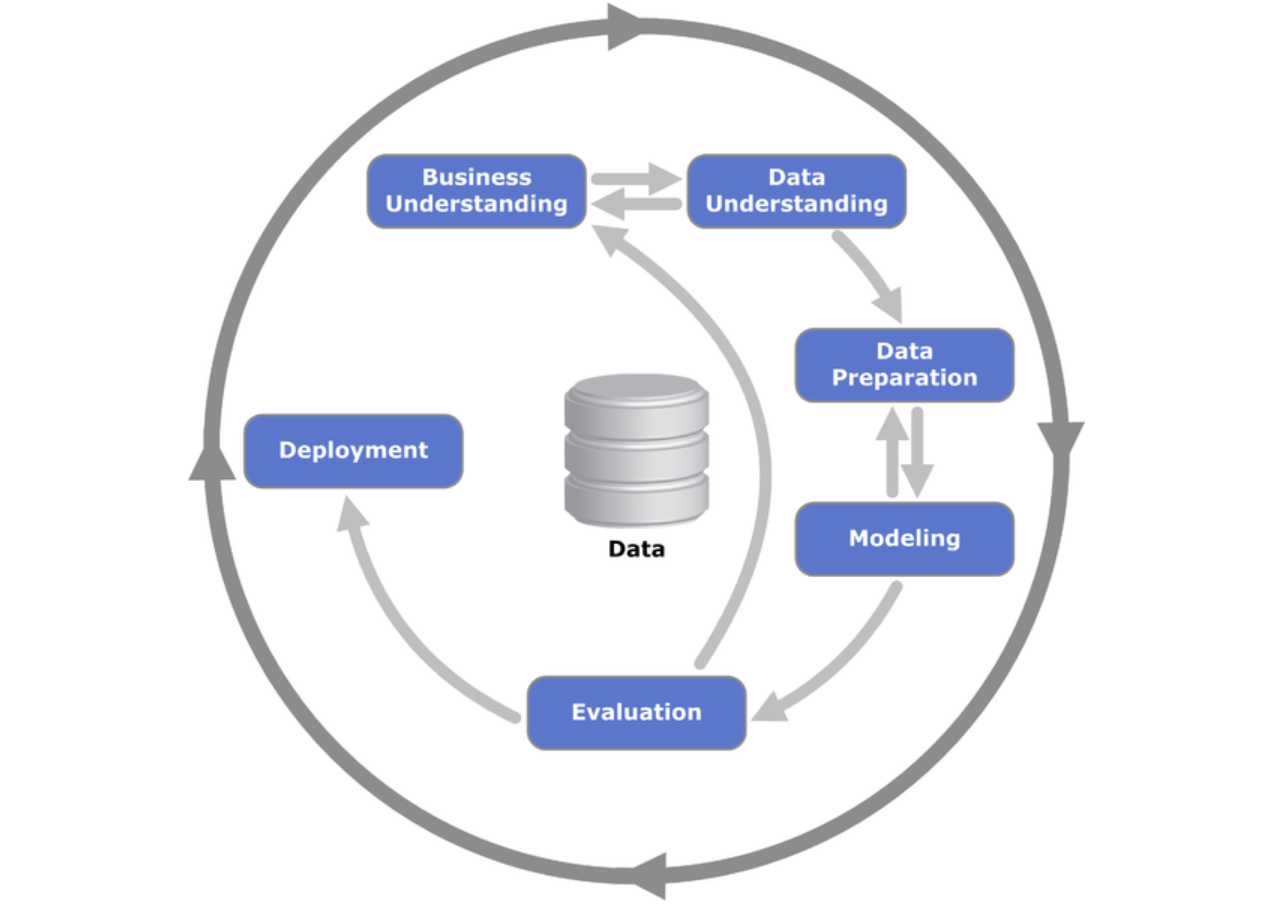

# **파일 업로드**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
# 확인
!ls

sample_data  test.csv


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv('test.csv')
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


# 1.Business Understanding

- 공유자전거 서비스 업계의 도메인을 이해
- 자전거라는 상품을 대여
- 대여되지 않은 자전거 대수가 적을수록 사업이 잘 된다고 판단
- 수요량을 잘 이해하고 있다면 인력이나 자원 할당의 최적화가 가능
- 요일, 날짜, 시간, 날씨에 따라 고객들의 서비스 이용량 증감 파악

# 2.Data Understanding

## Maryland 주 Washington D.C에서 자전거 공유 회사가 모은 데이터셋
* 출처: https://www.capitalbikeshare.com/system-data
* 2011~2012년도까지 2년치, 시간대별(1시간 간격)로
* 날짜정보(datetime, season, holiday, workingday)
* 기상정보(weather, temp, atemp, humidity, windspeed)
* 고객의 이용정보(casual, registered, count)
## 날짜 정보
* datetime: 년-월-일 시:분:초 정보, 분과 초는 X
* season: 계절 정보
* holiday: 해당 날짜가 휴일인지 여부
* workingday: 해당 날짜가 일하는 날인지 여부
## 기상 정보
* weather: 날씨가 험악한 정도(숫자가 커질수록 가혹함)
* temp: 온도
* atemp: 체감온도
* humidity: 습도
* windspeed: 풍속(km/h)
## 고객 정보
* casual: 비등록회원 이용객 수
* registered: 등록회원 이용객 수
* count: casual + registered

In [6]:
df.shape

(10886, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
df.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-10-11 04:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886,NaN,NaN,NaN,2.50661,1.11617,1,2,3,4,4
holiday,10886,NaN,NaN,NaN,0.0285688,0.166599,0,0,0,0,1
workingday,10886,NaN,NaN,NaN,0.680875,0.466159,0,0,1,1,1
weather,10886,NaN,NaN,NaN,1.41843,0.633839,1,1,1,2,4
temp,10886,NaN,NaN,NaN,20.2309,7.79159,0.82,13.94,20.5,26.24,41
atemp,10886,NaN,NaN,NaN,23.6551,8.4746,0.76,16.665,24.24,31.06,45.455
humidity,10886,NaN,NaN,NaN,61.8865,19.245,0,47,62,77,100
windspeed,10886,NaN,NaN,NaN,12.7994,8.16454,0,7.0015,12.998,16.9979,56.9969
casual,10886,NaN,NaN,NaN,36.022,49.9605,0,4,17,49,367


In [10]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [11]:
df.mean()

season          2.506614
holiday         0.028569
workingday      0.680875
weather         1.418427
temp           20.230860
atemp          23.655084
humidity       61.886460
windspeed      12.799395
casual         36.021955
registered    155.552177
count         191.574132
dtype: float64

In [12]:
df['count'].mean()

191.57413191254824

In [13]:
df[['weather', 'count']].corr()

,weather,count
weather,1.000000,-0.128655
count,-0.128655,1.000000


## Data Exploration

### Visualization
- 데이터를 눈에 잘 보이도록 그림으로 표현하는 것
- 시각적인 정보를 받아들이는 눈을 이용해 데이터를 해석하고자 함
- 대상이 누구인지를 명확하게 인지해야 함(모른다면 다수)
- 좋은 시각화 자료는 직관성 + 시인성이 좋음
- 대상군(audience): stakeholder, sponsor, technical audience
- pandas, matplotlib, seaborn 등 다양한 도구로 시각화 가능

### pandas 그래프 도구
- matplotlib과 기본적으로 동일한 형식
- pandas 만든이(Wes McKinney)가 만들 때 matplotlib을 판다스에 집어넣었기 때문

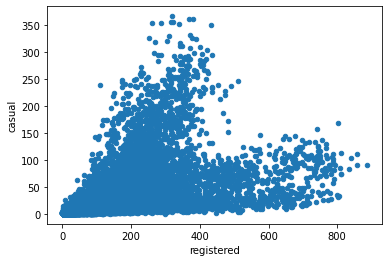

In [14]:
# 산점도(scatter) : 두 변수 간의 관계를 나타내는 그래프 방법, 산포된 점으로 그린 그림
import pandas as pd
df.plot.scatter(x = 'registered', y = 'casual')

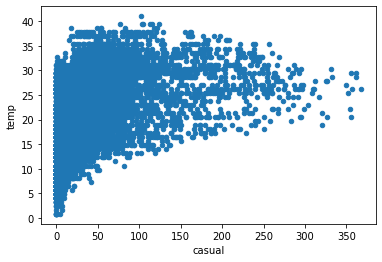

In [15]:
df.plot.scatter(x = 'casual', y = 'temp')

#### matplotlib
- 1세대 그래프 그리는 도구(근본)
- pandas의 내장된 그래프 도구보다 더 다양한 기능 제공

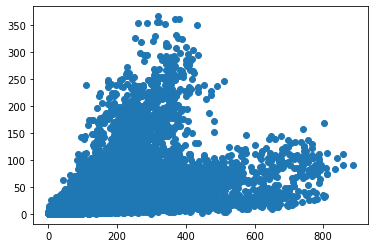

In [16]:
import matplotlib.pyplot as plt

plt.scatter(data = df, x = 'registered', y = 'casual')

#### seaborn
- matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전
- 비교적 단순한 인터페이스 제공

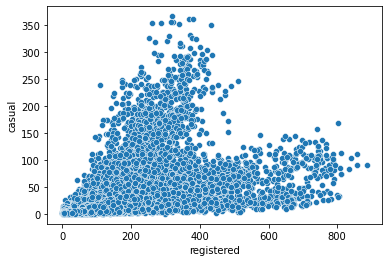

In [17]:
import seaborn as sns
sns.scatterplot(data = df, x = 'registered', y = 'casual')

##### seaborn의 hue기능
- 그래프의 색을 추가해 정보(차원)를 그래프에 반영
- hue는 그래프에 색상을 적용해 색깔의 차이를 이용해 정보를 더 넣을 수 있음
- scatterplot의 경우: 점의 산포에 색상 정보를 덧입힘

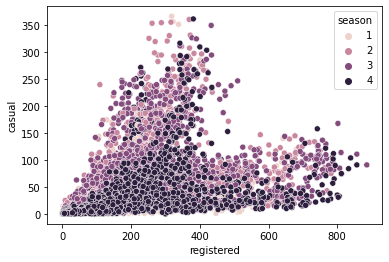

In [18]:
sns.scatterplot(data=df, x = 'registered', y = 'casual', hue = 'season')

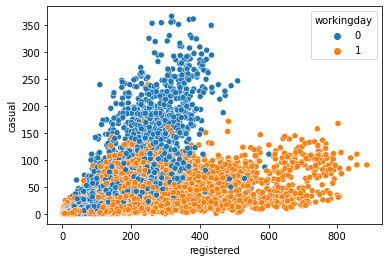

In [19]:
sns.scatterplot(data = df, x = 'registered', y = 'casual', hue = 'workingday')

## Data Handling
- 자료 정렬, 입출력 연산, 보고서 작성 등 공통적으로 수행하는 데이터 처리
- 파일 관점: 파일의 기본 구성 요소인 Record를 기반으로 Field를 조작하는 것
- Data Frame 관점: 행(Row)을 기반으로 열(Column)을 조작하는 것

### 특정 조건의 column 생성

In [20]:
# set() 함수로 내부 조건 확인
set(df['holiday'])

{0, 1}

Q1) holiday Column이 1인 Row에 대해 temp Column의 평균 구하세요.

In [21]:
# df['holiday'] == 1 -> holiday Column의 값 중 1이면 T, 아니면 F
# df.loc[df['holiday'] == 1 -> holiday Column의 값이 1인 Row 선택
# ['temp'] -> temp Column 선택
# np.mean -> 평균
np.mean(df.loc[df['holiday'] == 1]['temp'])

20.244244372990355

Q2) holiday Column이 1인 Row와 그렇지 않은 Row에 대해 temp Column의 평균의 차이를 제곱하세요.


In [22]:
h_1_mean = np.mean(df.loc[df['holiday'] == 1]['temp'])
h_0_mean = np.mean(df.loc[df['holiday'] != 1]['temp'])
(h_1_mean - h_0_mean) ** 2

0.0001898382203312306

Q3) holiday Column이 0인 Row에 대하여 표준편차가 0.5 초과인 Column은 무엇인가?

In [23]:
# df.loc[df['holiday'] == 0] -> holiday Column이 0인 Row 선택
# .describe() -> Column들의 표준편차를 일괄적으로 구함
# .T -> 표준편차(std)는 Column이 아니라 Index에 잡혀있음
# .loc 하여 filtering 하려면 Column에 있어야 해서 .T 이용해 Column 영역으로 옮김
desc = df.loc[df['holiday'] == 0].describe().T

# desc['std'] > 0.5 -> 표준편차가 0.5 초과인 Row를 Boolean 조건 True로
# desc.loc[desc['std'] > 0.5] -> 표준편차가 0.5 초과인 Row를 선별
# .T -> 원본 데이터셋 상 Column 이름들이 Index에 있었으므로 다시 Column 영역으로
# .columns -> Column 이름들을 확인
desc.loc[desc['std'] > 0.5].T.columns

Index(['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [24]:
# cold column을 만들어 0을 저장하고, 온도가 5도 이하일때 1로 변경
df['cold'] = 0
df.loc[df['temp'] < 5, 'cold'] = 1
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,cold
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


### Function mapping
- Series나 Data Frame의 개별 원소를 특정 함수에 일대일 대응시키는 과정
- Pandas의 내장 함수로 처리하기 어려운 연산을 함수 매핑을 통해 Pandas 객체에 적용할 수 있음
- DataFrame에 함수 매핑 : df.apply(매핑 함수)
- apply()는 column의 모든 값에 괄호 안에 있는 규칙을 적용함

In [25]:
df['temp'] / 10

0        0.984
1        0.902
2        0.902
3        0.984
4        0.984
         ...  
10881    1.558
10882    1.476
10883    1.394
10884    1.394
10885    1.312
Name: temp, Length: 10886, dtype: float64

In [26]:
df['temp'].apply(lambda x:x/10)

0        0.984
1        0.902
2        0.902
3        0.984
4        0.984
         ...  
10881    1.558
10882    1.476
10883    1.394
10884    1.394
10885    1.312
Name: temp, Length: 10886, dtype: float64

### 날짜 슬라이싱

In [27]:
df['year'] = df['datetime'].apply(lambda x:int(x[:4]))
df['month'] = df['datetime'].apply(lambda x:int(x.split(' ')[0].split('-')[1]))
df['day'] = df['datetime'].apply(lambda x:int(x.split(' ')[0].split('-')[2]))
df['hour'] = df['datetime'].apply(lambda x:int(x.split(' ')[1].split(':')[0]))

In [28]:
# 여러개의 조건을 만족하는 Row를 특정하는 방법
# 2011년도 1월만 선택

# 1) 쉬운방법
year = df.loc[df['year'] == 2011]
yearmonth = year.loc[year['month'] == 1]
print(yearmonth)

# 2) 문법적인 방법
df.loc[(df['year'] == 2011) & (df['month'] == 1)]

                datetime  season  holiday  workingday  ...  year  month  day  hour
0    2011-01-01 00:00:00       1        0           0  ...  2011      1    1     0
1    2011-01-01 01:00:00       1        0           0  ...  2011      1    1     1
2    2011-01-01 02:00:00       1        0           0  ...  2011      1    1     2
3    2011-01-01 03:00:00       1        0           0  ...  2011      1    1     3
4    2011-01-01 04:00:00       1        0           0  ...  2011      1    1     4
..                   ...     ...      ...         ...  ...   ...    ...  ...   ...
426  2011-01-19 19:00:00       1        0           1  ...  2011      1   19    19
427  2011-01-19 20:00:00       1        0           1  ...  2011      1   19    20
428  2011-01-19 21:00:00       1        0           1  ...  2011      1   19    21
429  2011-01-19 22:00:00       1        0           1  ...  2011      1   19    22
430  2011-01-19 23:00:00       1        0           1  ...  2011      1   19    23

[43

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,cold,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2011-01-19 19:00:00,1,0,1,1,13.12,14.395,57,27.9993,4,108,112,0,2011,1,19,19
427,2011-01-19 20:00:00,1,0,1,1,13.12,15.150,49,19.9995,2,74,76,0,2011,1,19,20
428,2011-01-19 21:00:00,1,0,1,1,13.12,14.395,49,27.9993,4,55,59,0,2011,1,19,21
429,2011-01-19 22:00:00,1,0,1,1,12.30,15.150,52,11.0014,6,53,59,0,2011,1,19,22


In [29]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,cold,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,0,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,0,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,0,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,0,2012,12,19,22


### 요일 정보 추출

In [30]:
sample = '2022-01-04 00:00:00'
parsed = pd.to_datetime(sample)
parsed

Timestamp('2022-01-04 00:00:00')

In [31]:
# 0(월요일) ~ 6(일요일)
parsed.dayofweek

1

In [32]:
df['dayofweek'] = df['datetime'].apply(lambda x:pd.to_datetime(x).dayofweek)
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


### 그룹 연산
- 특정 기준으로 그룹을 분할하여 처리
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적

#### df.groupby(기준이 되는 열)
-  year Column의 경우의 수 기준으로 Row들을 그룹 지음

In [33]:
year = df.groupby('year')

#### aggregation(agg)
- {'count':np.mean} -> count column에 대해 np.mean연산을 일괄 수행

In [34]:
year_count = year.agg({'count':np.mean})
year_count.reset_index()

,year,count
0,2011,144.223349
1,2012,238.560944


In [35]:
df.groupby('year').agg({'count':np.mean}).reset_index()

,year,count
0,2011,144.223349
1,2012,238.560944


In [36]:
# multi-index aggregation (2개 이상의 기준을 잡아 일괄 계산)
interested = ['year', 'season']
ys_count = df.groupby(interested).agg({'count':np.mean}).reset_index()
ys_count

,year,season,count
0,2011,1,71.905518
1,2011,2,160.940746
2,2011,3,186.994872
3,2011,4,154.787125
4,2012,1,159.476889
5,2012,2,269.601757
6,2012,3,281.735380
7,2012,4,243.189466


### 방향성에 맞는 그래프 생성, 해석

In [37]:
print(df.shape)
df.head().T

(10886, 18)


,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


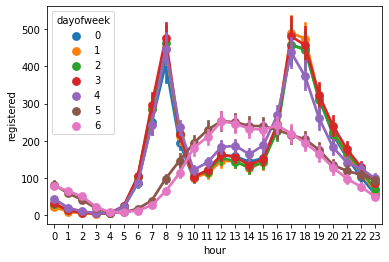

In [38]:
sns.pointplot(data=df, x = 'hour', y = 'registered', hue = 'dayofweek')


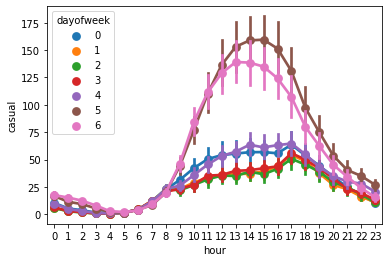

In [39]:
sns.pointplot(data = df, x = 'hour', y = 'casual', hue = 'dayofweek')

In [40]:
# 일하는 날에는 등록회원이 많이 사용하고, 일하지 않는 날에는 비등록 회원이 많이 이용한다.
# 등록회원과 비등록회원이 사용하는 빈도의 차이는 일하는 날과 일하지 않는 날의 차이이다
#-----위 그래프를 분석한 결과-----
# 등록회원 : 출근 시간대와 퇴근 시간대에 사용량이 빈번하고
# 비등록회원 : 점심 시간대에 사용량이 빈번하다
# 등록회원 : 평일 출근 시간대와 퇴근 시간대 이용량이 높고, 주말엔 상반된 결과를 보인다.
# 비등록회원 : 평일에 사용량이 낮고, 주말 점심 시간대에 이용량이 가장 높음

# 3.Data Preparation
- 데이터를 분석 모형에 넣어 학습을 진행하기 위한 준비과정
- train, test split --> Row 분리
- 문제와 정답(features, label) 분리 --> column 분리 --> 분석 방향성
- (날짜, 날씨, 시간)이 이용량(casual, registered, count)에 영향을 줄 것
- 방향성 : 요일, 날짜, 시간, 날씨에 따라 고객들의 서비스 이용량 증감

In [41]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'cold', 'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [42]:
features = [ 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',  
       'year', 'month', 'day', 'hour', 'dayofweek']
label = 'count'

# train, test split
# 서로 중복되는 Row가 존재하지 않게 홀, 짝으로 나눔
train, test = df[0::2], df[1::2]

# index 재설정
train, test = train.reset_index(), test.reset_index() 
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

# 4.Modeling


## Model planning
- 지도학습의 사례 2가지(객관식, 주관식)
- 분류(Classification): 객관식(경우의 수)
- 회귀(Regression): 주관식(숫자)
- 현 데이셋은 숫자를 공부하는 것이므로 회귀문제
- 현재 분석 방향성 : 고객들의 이용량(숫자)이 label이므로 회귀문제
- 알고리즘 선택할 때 이름과 세부 설명상 수식어로 판단하는 방법: Regressor -> 회귀모델, Classifier -> 분류모델
- 단, Logistic Regression은 위 규칙에서 제외

## Model building
- 모델을 가져와 생성(학습하기 전 단계)
- 모델 학습(학습용 데이터 이용)
- 평가지표 적용(학습용 시험용 둘 다 적용)

#### sklearn 
- ML 계열 성향이 짙은 알고리즘을 활용하는 파이썬 라이브러리
- 정형 데이터, DataFrame, Excel 형태의 데이터 -> ML 계열 알고리즘
- 이미지, 영상, 음성, 사람이 사용하는 글 -> DL 계열 알고리즘


### RandomForesetRegressor


In [43]:
from sklearn.ensemble import RandomForestRegressor as rf

# 알고리즘 생성해 model 변수로 사용
model = rf()

# fitting(적합, 학습, fit처럼 다양하게 표현)
# 문제집을 가지고 학습하는 개념으로 문제(X_train)와 답지(y_train)가 필요
model.fit(X_train, y_train)

# 시험후 점수 확인
# train, test 문제(X_) 풀고, 정답지(y_) 이요해 점수 확인
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# R-Squared(R2) 라는 평가지표를 사용
print(train_score, test_score)



0.9919543749998098 0.9226109566216122


## 결정계수
- 회귀 분석이 얼마나 잘 되었는지 평가하는 지표
- 회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가? 에 대한 점수
- 회귀에서는 예측하는 값이나 타깃이 임의의 수치이므로 정확한 숫자를 맞힌다는 것은 거의 불가능 함
- R2는 0~1 사이의 값을 갖고, 1에 가까울수록 예측력이 좋다고 판단(데이터를 잘 설명하는 모델)
- 1이면 100% 정답으로 맞춘 것(오차 X)
- 샘플의 타깃과 예측한 값의 차이를 제곱하여 더함
- 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눔
- 타깃의 평균 정도를 예측하는 수준이라면(분자와 분모가 비슷하다면) R2는 0에 가까워지고,
- 예측이 타깃에 가까워지면(분자가 0에 가까워지기 때문에) 1에 가까운 값이 됨

## 과대적합(Over-fitting)과 과소적합(Under-fitting)
- Over-fitting : 샘플에 모델이 과하게 적합되어 잇는 상태
- Under-fitting : 샘플에 모델이 너무 부족하게 적합되어 있는 상태


In [44]:
# 과적합 발생 알고리즘의 점수 예시
# 과적합 발생 알고리즘 : Decision Tree ->. 데이터셋 100% 다 외움

from sklearn.tree import DecisionTreeRegressor as dt
model_dt = dt()
model_dt.fit(X_train,y_train)
train_score = model_dt.score(X_train, y_train)
test_score = model_dt.score(X_test, y_test)
print(train_score, test_score)

1.0 0.8576994837070993


In [45]:
# DecisionTree는 RandomForest에 비해 학습용 문제는 잘 풀지만 시험용 문제는 잘 풀지 못함
# 일반화 (Generalization) 실패

## 다양한 회귀문제 평가지표들
- 약어로 구성되어 있음: R(Root), M(Mean), S(Squard), L(Log), P(Percentile), A(Absolute), E(Error)
- ex) MAPE: 오차의 비율을 절대값 씌우고 평균
- ex) MAE: 오차를 절대값 씌우고 평균
- ex) MSE: 오차를 제곱하여 평균
- ex) RMSE: 오차를 제곱하여 평균한 것에 제곱근 적용
- ex) RMSLE: 로그오차를 제곱하여 평균한 것에 제곱근 적용
- 그 외의 평가지표들: Adj.R2, AIC, BIC

### log오차 예시
- 작은 값들 끼리의 차이와 큰 값들 끼리의 차이에 차등을 두기 위함


In [46]:
import numpy as np

# 경우1 (예측값과 실측값이 작은 영역에서의 1차이)
err1 = np.log(2) - np.log(1)
err1

0.6931471805599453

In [47]:
# 경우2 (예측값과 실측값이 큰 영역에서의 1차이)
err2 = np.log(1002) - np.log(1001)
err2

0.0009985023295895346

## 평가지표의 값이 높고 낮음의 의미를 시각화

In [48]:
# 데이터 정답을 예측
model.predict(X_train)

array([ 20.44,  28.11,   3.07, ..., 566.72, 248.73, 132.27])

In [49]:
# 예측 결과와 정답을 저장할 빈 DataFrame 생성
for_plot = pd.DataFrame()

# 학습용 문제로 문제풀기
for_plot['train_predict'] = model.predict(X_train)
# 학습용 문제의 정답
for_plot['train_actual'] = y_train

# 시험용 문제로 문제풀기
for_plot['test_predict'] = model.predict(X_test)
# 시험용 문제의 정답
for_plot['test_actual'] = y_test

for_plot.head()

,train_predict,train_actual,test_predict,test_actual
0,20.44,16,22.37,40
1,28.11,32,15.89,13
2,3.07,1,4.31,1
3,3.11,2,31.90,3
4,27.18,8,53.42,14


0.9919543749998098


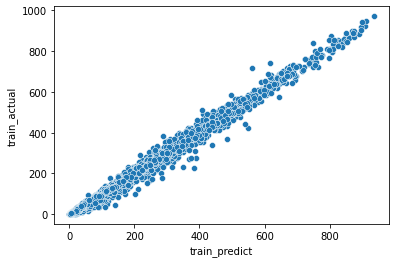

In [50]:
print(model.score(X_train, y_train))
sns.scatterplot(data = for_plot, x = 'train_predict', y = 'train_actual')

0.9226109566216122


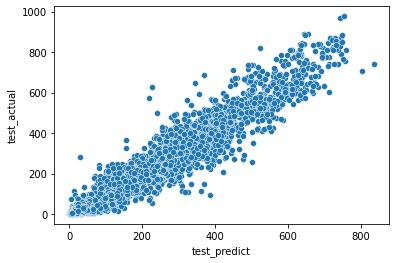

In [51]:
print(model.score(X_test, y_test))
sns.scatterplot(data = for_plot, x = 'test_predict', y = 'test_actual')

### 과대적합 발생 알고리즘 예시

In [52]:
from sklearn.tree import DecisionTreeRegressor as dt

model_dt = dt()
model_dt.fit(X_train, y_train)
train_score_dt = model_dt.score(X_train, y_train)
test_score_dt = model_dt.score(X_test, y_test)

print(train_score_dt, test_score_dt)

1.0 0.8586467070788523


In [53]:
for_plot_dt = pd.DataFrame()

for_plot_dt['train_predict'] = model_dt.predict(X_train)
for_plot_dt['train_actual'] = y_train
for_plot_dt['test_predict'] = model_dt.predict(X_test)
for_plot_dt['test_actual'] = y_test

for_plot_dt.head()

,train_predict,train_actual,test_predict,test_actual
0,16.0,16,16.0,40
1,32.0,32,4.0,13
2,1.0,1,2.0,1
3,2.0,2,8.0,3
4,8.0,8,128.0,14


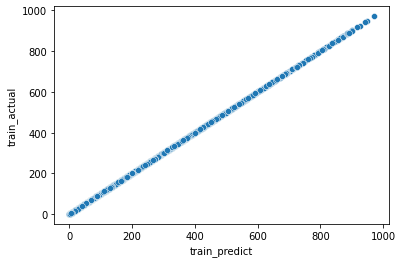

In [54]:
sns.scatterplot(data = for_plot_dt, x = 'train_predict', y = 'train_actual')

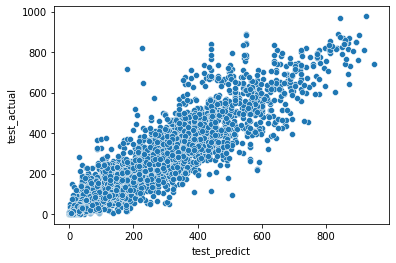

In [55]:
sns.scatterplot(data = for_plot_dt, x = 'test_predict', y = 'test_actual')

## Feature Selection (변수 선택법)
- 과적합 방지하고, 일반화를 달성하기 위해 사용하는 방법
- 모든 변수를 다 사용하지 않고 골라서 사용
- 변수를 선택해서 사용하기 때문에 학습속도 증진을 기대할 수 있음(데이터 용량 감소)
- 방법론 3가지: Filter, Wrapper, Embed



### Filter
- 기초통계량을 기반으로 feature 간의 관계에서 높은 상관계수(영향력)를 가지는 feature를 사용하는 방법
- ex) 표준편차가 0 에 가까우면 해당 feature 삭제
- IOT Sensor data(풍속, 온도, 습도, ...), Smart factory 쪽 센서류의 경우 종종 발생
- Filter 방식이 유효한 경우는 분야에 따라 다름

In [56]:
df.describe().T.sort_values(by = 'std')

,count,mean,std,min,25%,50%,75%,max
cold,10886.0,0.011850,0.108216,0.00,0.0000,0.000,0.0000,1.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
year,10886.0,2011.501929,0.500019,2011.00,2011.0000,2012.000,2012.0000,2012.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
dayofweek,10886.0,3.013963,2.004585,0.00,1.0000,3.000,5.0000,6.0000
month,10886.0,6.521495,3.444373,1.00,4.0000,7.000,10.0000,12.0000
day,10886.0,9.992559,5.476608,1.00,5.0000,10.000,15.0000,19.0000
hour,10886.0,11.541613,6.915838,0.00,6.0000,12.000,18.0000,23.0000


In [57]:
# 표준편차가 가장 낮은 column인 holiday 제거

### Wrapper
- feature를 하나씩 넣고, 빼면서 평가지표 점수 확인(시행착오)
- feature의 조합에 따라 평가지표의 수치(채점 점수)가 달라진다는 것으로부터 출발
- feature 조합별로 평가지표 점수 확인하여 점수가 가장 좋은 조합을 찾아내는 것
- Wrapper의 방법: 전진 선택(forward selection), 후방 제거(backward Elimination), 단계별 선택(stepwirse selection)

In [58]:
features = ['season',  'workingday', 'weather', 'temp', 'atemp',
           'humidity', 'windspeed', 'year', 'month', 'hour', 'day', 'dayofweek']
label = 'count'

train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

model = rf()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.923119359643997

In [59]:
from sklearn.feature_selection import RFE # Recursive Feature Elimination
features = ['season',  'workingday', 'weather', 'temp', 'atemp',
           'humidity', 'windspeed', 'year', 'month', 'hour', 'day', 'dayofweek']
label = 'count'

train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

model = rf()
model.fit(X_train, y_train)

selector = RFE(estimator=model) # 어떤 알고리즘을 이용해 feature selection을 할 것인지 반영
selector.fit(X_train, y_train) # RFE 방식으로 어떤 feature가 중요할지 판단

rfe_df = pd.DataFrame()
rfe_df['rank'] = selector.ranking_
rfe_df['feature'] = features
rfe_df.sort_values(by = 'rank')

,rank,feature
3,1,temp
4,1,atemp
7,1,year
8,1,month
9,1,hour
11,1,dayofweek
1,2,workingday
5,3,humidity
2,4,weather
10,5,day


### Embed
- 알고리즘 중에서 각 feature들이 의사결정에 사용된 정도가 들어있는 경우
- Tree 계열이나 Regularizer가 내부에 있는 경우
- 알고리즘의 공식문서에 Lasso, L1 표현이 있는 경우

In [60]:
model

RandomForestRegressor()

In [61]:
# 알고리즘 내부에서 얼마나 많이 사용되었는가? 를 나타내는 수치가 들어있음(비율)
model.feature_importances_

array([0.00860699, 0.05461986, 0.016151  , 0.04546324, 0.05944466,
       0.02488168, 0.00837854, 0.07019948, 0.04727248, 0.60908178,
       0.01038983, 0.04551046])

In [62]:
fi_df = pd.DataFrame()
fi_df['importance'] = model.feature_importances_
fi_df['feature'] = features
fi_df = fi_df.sort_values(by = 'importance', ascending=True)
fi_df

,importance,feature
6,0.008379,windspeed
0,0.008607,season
10,0.010390,day
2,0.016151,weather
5,0.024882,humidity
3,0.045463,temp
11,0.045510,dayofweek
8,0.047272,month
1,0.054620,workingday
4,0.059445,atemp


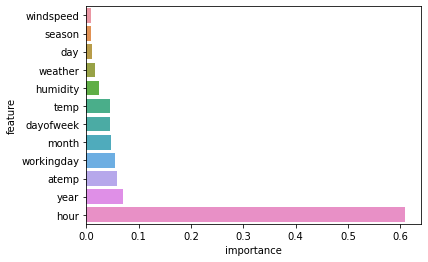

In [63]:
sns.barplot(data = fi_df, x = 'importance', y = 'feature')